In [53]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from functions import load_data
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]

In [3]:
data = load_data()
data.head()

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
177279,1,2000-01-31,0.41,0.39,0.42,0.19,0.65,0.63,0.50,0.90,...,0.74,0.82,0.88,0.74,0.77,0.68,-0.036,0.196,0.255,1.044
83327,2,2000-01-31,0.70,0.74,0.72,0.55,0.36,0.30,0.51,0.84,...,0.19,0.10,0.10,0.02,0.91,0.91,0.659,-0.406,-0.593,-0.642
48737,3,2000-01-31,0.15,0.12,0.15,0.02,0.42,0.18,0.05,0.06,...,0.42,0.58,0.94,0.88,0.22,0.49,0.077,0.085,0.194,0.406
146239,4,2000-01-31,0.37,0.32,0.35,0.29,0.78,0.52,0.95,0.90,...,0.55,0.61,0.69,0.55,0.21,0.09,-0.016,0.127,0.161,0.237
165974,5,2000-01-31,0.80,0.81,0.78,0.58,0.60,0.59,0.17,0.41,...,0.46,0.05,0.06,0.14,0.76,0.76,0.447,0.245,-0.290,0.216


A factor or anomaly is identified if the average returns of the first and the last group constructed according to a particular ranking criteria are different significantly according to statistical test.

<Axes: xlabel='year'>

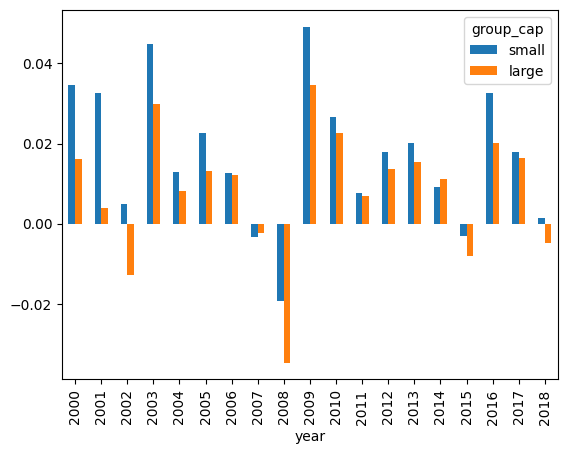

In [12]:
# To show the size effect
df = data[["date","stock_id", "Mkt_Cap_12M_Usd", "R1M_Usd"]]

# at each time pt, we separate equitys into two groups according to their 12-month average market cap
def trans(x):
    y = x > x.median()
    return y.replace({True:"large", False:"small"})

df["group_cap"] = df.groupby("date")["Mkt_Cap_12M_Usd"].transform(trans)
#df["group"] = np.where(df["Mkt_Cap_12M_Usd"] > df["mean_cap"], "large","small")
df["year"] = df["date"].dt.year
# we then calculate the 1-month forward return of the equal-weighted portfolio corresponding to these two groups
# finally we average the return of the portfolios over each year.
# this two steps can be merged into one
g = df.groupby(["year", "group_cap"]).R1M_Usd.aggregate("mean").unstack()
g.plot(kind="bar",  y=["small", "large"])

As can be seen small cap stocks give higher return most of the time.

### Coding exercises

#### 1. Compute annual returns of growth versus value portfolios

<Axes: xlabel='year'>

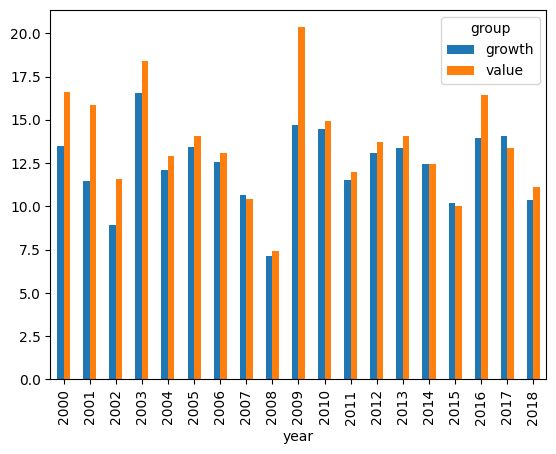

In [39]:
# construct portfolios
df = data[["date","stock_id", "Pb", "R1M_Usd"]]

# at each time pt, we separate equitys into two groups according to price-to-book ratio
def trans(x):
    y = x > x.median()
    return y.replace({True:"growth", False:"value"})

df["group"] = df.groupby("date")["Pb"].transform(trans)
# calculate monthly return of each portfolio
m_ret_p = df.groupby(["date", "group"])["R1M_Usd"].aggregate("mean").unstack()

# calculate annualized return
m_ret_p["year"] = m_ret_p.index.to_series().dt.year
m_ret_p.groupby("year").aggregate(lambda x: (x+1).prod()*12-1).plot(kind="bar",  y=["growth", "value"])
# we see that value stocks outperform growth stock

#### 2. Same exercise, but compute the monthly returns and plot the value over time

<Axes: xlabel='date'>

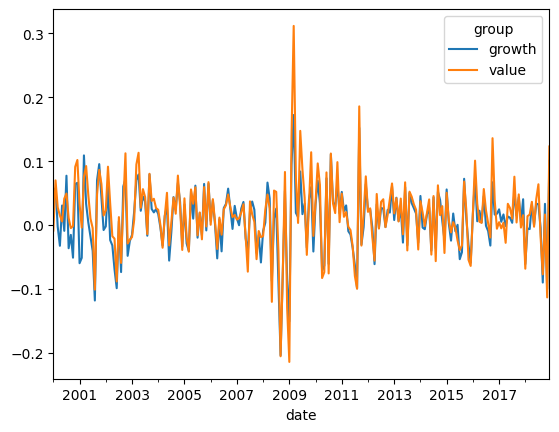

In [40]:
m_ret_p.plot(y=["growth","value"])

Compare the results from ex.1 and ex.2, we might conclude factor works only over long time horizon.

#### 3. Instead of a unique threshold, compute annual returns of sorted portfolios based on quartiles of market cap

<Axes: xlabel='year'>

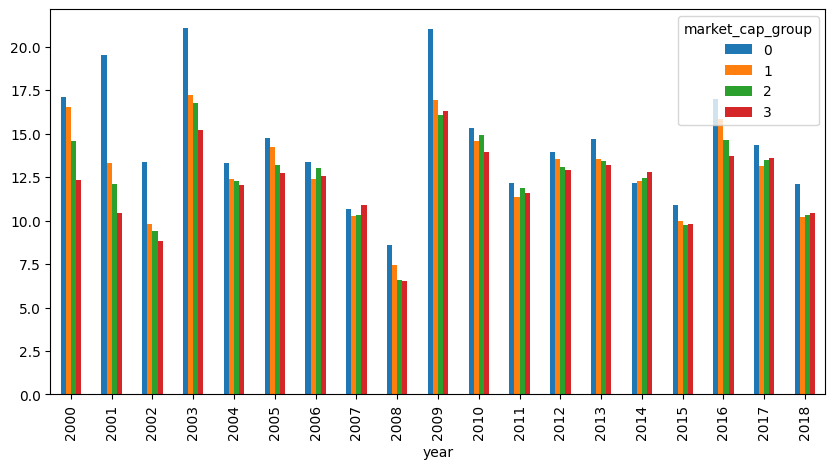

In [54]:
# construct portfolios
df = data[["date","stock_id", "Mkt_Cap_12M_Usd", "R1M_Usd"]]

# at each time pt, we separate equitys into 4 groups according to their market cap
df["market_cap_group"] = df.groupby("date")["Mkt_Cap_12M_Usd"].transform(lambda x: pd.qcut(x, 4, labels=False))
#df.head()
# calculate monthly return of each portfolio
m_ret_p = df.groupby(["date", "market_cap_group"])["R1M_Usd"].aggregate("mean").unstack()

# calculate annualized return
m_ret_p["year"] = m_ret_p.index.to_series().dt.year

m_ret_p.groupby("year").aggregate(lambda x: (x+1).prod()*12-1).plot(kind="bar")